<a href="https://colab.research.google.com/github/ChristianaKiervin/MLnow_2.0/blob/main/Univariate%20Linear%20Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Univariate Linear Regression



[Link to Download the dataset]()

**Date Created**: June 6, 2021


**Author**:
Christiana Kiervin


## Setup

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd '/content/drive/MyDrive/ML Course/housing'

/content/drive/MyDrive/ML Course/housing


In [9]:
ls

test.csv  train.csv  univariate_housingData.csv


In [10]:
import os

In [11]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [12]:
trainData = pd.read_csv('train.csv') #load the train csv file as dataframe

In [13]:
trainData.head(10) #print the first ten rows of the train dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

We are just going to consider lot area and sale price for this univariate linear regression

$salePrice_i = lotArea_i  \cdot \theta_1 + \theta_0$

In [14]:
uniTrainData = trainData[['LotArea', 'SalePrice']]
uniTrainData.head(5)

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [15]:
uniTrainData.to_csv('univariate_housingData.csv')

In [16]:
ls

test.csv  train.csv  univariate_housingData.csv


## Data visualization

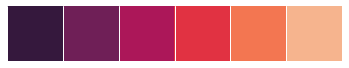

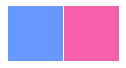

In [17]:
import seaborn as sns
sns.palplot(sns.color_palette('rocket')) #Purple to Orange colors
pal = sns.color_palette('rocket', 6) #print 6 color shades from rocket
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#6698FF', '#F660AB'] #blue and pink hex codes (see: https://www.colorschemer.com/hex-color-codes/#:~:text=HEX%20Color%20Codes%20Chart%20%20%20%20HEX,%20%20Midnight%20%2099%20more%20rows%20)
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [18]:
uniTrainData.columns #columns in the dataframe

Index(['LotArea', 'SalePrice'], dtype='object')

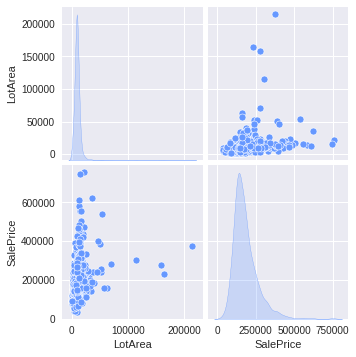

In [19]:
#pairplot for all the values

sns.pairplot(uniTrainData,
             x_vars = ['LotArea', 'SalePrice'],
             y_vars =  ['LotArea', 'SalePrice'],
       diag_kind='kde'
             )

## Data Splits

In [20]:
#80-20 train-test percent split

trainDataset = uniTrainData.sample(frac=0.8, random_state=0) 
testDataset = uniTrainData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     LotArea  SalePrice
529    32668     200624
491     9490     133000
459     7015     110000
279    10005     192000
655     1680      88000
    LotArea  SalePrice
11    11924     345000
23     4224     129900
24     8246     154000
25    14230     256300
28    16321     207500


In [21]:
print(trainDataset.shape)
print(testDataset.shape)

(1168, 2)
(292, 2)


In [22]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     LotArea  SalePrice
529    32668     200624
491     9490     133000
459     7015     110000
279    10005     192000
655     1680      88000
    LotArea  SalePrice
11    11924     345000
23     4224     129900
24     8246     154000
25    14230     256300
28    16321     207500


In [23]:
#removing the SalePrice column and saving it into the labels variable

trainLabels = trainFeatures.pop('SalePrice')
testLabels = testFeatures.pop('SalePrice')

print(trainLabels.head())
print(testLabels.head())

529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
11    345000
23    129900
24    154000
25    256300
28    207500
Name: SalePrice, dtype: int64


In [24]:
print(trainFeatures.head())
print(testFeatures.head())

     LotArea
529    32668
491     9490
459     7015
279    10005
655     1680
    LotArea
11    11924
23     4224
24     8246
25    14230
28    16321


In [25]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [27]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #use this line if you wanted to just take the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [33]:
numEpochs = 3000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
37/37 [==============================] - 0s 2ms/step - loss: 71023.1094 - mae: 71023.1094 - mse: 25030774784.0000 - val_loss: 68008.1953 - val_mae: 68008.1953 - val_mse: 28845350912.0000
Epoch 502/3000
37/37 [==============================] - 0s 1ms/step - loss: 71022.7656 - mae: 71022.7656 - mse: 25034430464.0000 - val_loss: 68008.2500 - val_mae: 68008.2500 - val_mse: 28845518848.0000
Epoch 503/3000
37/37 [==============================] - 0s 2ms/step - loss: 71023.5859 - mae: 71023.5859 - mse: 25040130048.0000 - val_loss: 68011.0156 - val_mae: 68011.0156 - val_mse: 28852563968.0000
Epoch 504/3000
37/37 [==============================] - 0s 2ms/step - loss: 71022.6016 - mae: 71022.6016 - mse: 25036695552.0000 - val_loss: 68007.4688 - val_mae: 68007.4688 - val_mse: 28843538432.0000
Epoch 505/3000
37/37 [==============================] - 0s 2ms/step - loss: 71022.8125 - mae: 71022.8125 - mse: 25032538112.0000 - val_loss: 

In [29]:
print(history)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


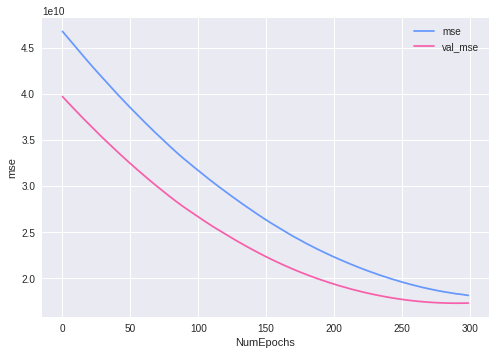

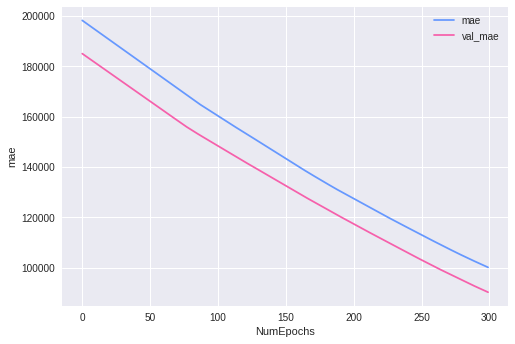

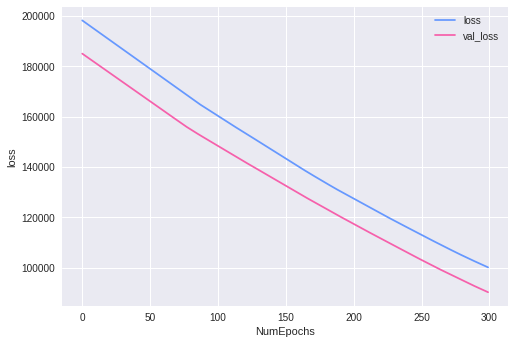

In [31]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [32]:
model.predict([1])

array([[20.129738]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.253069]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.253069 ]
 [3.137846 ]
 [4.0226226]
 [4.9073997]
 [5.7921767]]

List of Predictions (flattened out):
[2.253069  3.137846  4.0226226 4.9073997 5.7921767]



In [ ]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [ ]:
print(len(testPreds))
print(testPreds)

79
[13.755169   6.6769533 11.100839  16.4095    16.4095    11.985615
 13.755169  18.179054  18.179054   8.446507  13.755169  12.870392
  8.446507   7.5617304  9.3312845 12.870392  11.100839  15.524723
  7.5617304 10.216062  14.639946  12.870392  13.755169  15.524723
  7.5617304  7.5617304  8.446507  10.216062  11.985615  10.216062
 11.985615  12.870392  10.216062   6.6769533  9.3312845 11.985615
  7.5617304  8.446507  13.755169   9.3312845  9.3312845  7.5617304
 11.985615   6.6769533 12.870392   7.5617304  7.5617304 11.100839
 12.870392  16.4095    11.985615  14.639946   9.3312845 11.985615
 14.639946  11.985615  14.639946  11.985615  14.639946  11.100839
 11.985615   8.446507  15.524723   7.5617304 15.524723  11.100839
 15.524723  12.870392   8.446507   8.446507  11.985615  17.294277
 12.870392  15.524723  10.216062   7.5617304 10.216062   7.5617304
 11.100839 ]


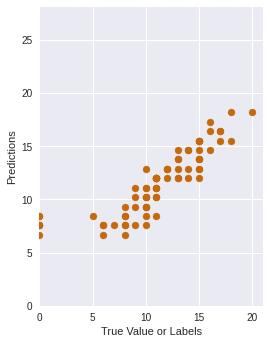

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

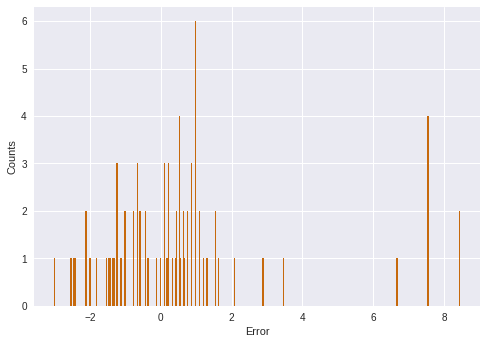

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions